In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"E:\ML\Bigmart.csv")

In [3]:
df.shape

(8523, 12)

In [4]:
#Data PReprocessing
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
import seaborn as sns

<AxesSubplot:>

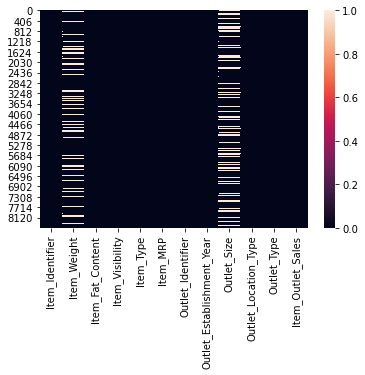

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

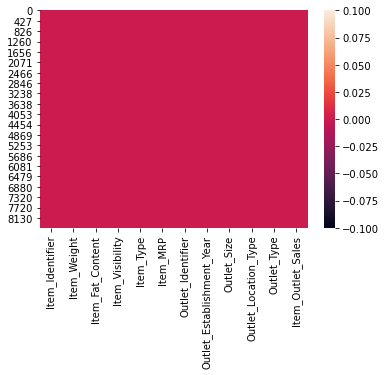

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [12]:
a=df.drop(["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1)

In [13]:
a.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
l=LabelEncoder()

In [16]:
a["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [17]:
identifier=l.fit_transform(a["Item_Identifier"])
fat=l.fit_transform(a["Item_Fat_Content"])
types=l.fit_transform(a["Item_Type"])

In [19]:
b=a.drop(["Item_Identifier","Item_Fat_Content","Item_Type"],axis=1)

In [20]:
b.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228


In [23]:
b["Identifier"]=identifier
b["Fat"]=fat
b["Products"]=types

In [24]:
b.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Identifier,Fat,Products
0,9.30,0.016047,249.8092,3735.1380,154,1,4
1,5.92,0.019278,48.2692,443.4228,8,2,14


In [25]:
X=b.drop("Item_Outlet_Sales",axis=1)

In [26]:
y=b[["Item_Outlet_Sales"]]

In [27]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
reg=LinearRegression()

In [68]:
reg.fit(X_train,y_train)

LinearRegression()

In [69]:
val=reg.predict(X_test)

In [70]:
val

array([[2975.63050678],
       [3756.56027532],
       [1884.91327038],
       [1628.59916269],
       [3086.81495831],
       [4265.20507658],
       [2775.25542774],
       [2348.30674399],
       [3715.58002018],
       [2291.77088518],
       [1460.00117595],
       [4312.18777543],
       [ 688.82392197],
       [1868.78235332],
       [1354.41271276],
       [1492.36030607],
       [ 671.54160911],
       [2550.5573836 ],
       [1652.13763525],
       [ 919.70047159],
       [3046.19175152],
       [3873.18068931],
       [1503.40977369],
       [1047.7075771 ],
       [1988.02767778],
       [2126.51702808],
       [2442.01633259],
       [3730.20948817],
       [2667.51538398],
       [3977.30675078],
       [1612.73953916],
       [ 516.85091498],
       [2776.21958571],
       [1706.40339555],
       [2149.56433663],
       [ 681.65707312],
       [3069.89951502],
       [3058.65509676],
       [ 808.33615047],
       [2066.13866193],
       [1914.88350405],
       [2639.439

In [71]:
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
mean_squared_error(val,y_test)

1038466.8560303953

In [73]:
r2_score(val,y_test)

0.030814553815085577

In [74]:
import matplotlib.pyplot as plt

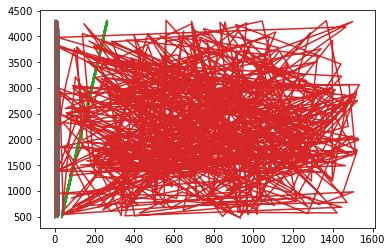

In [75]:
plt.plot(X_test,reg.predict(X_test))